Генеративно-состязательная нейросеть (GAN) — архитектура, состоящая из генератора и дискриминатора, настроенных на работу друг против друга. Отсюда GAN и получила название генеративно-созтязательная. В случае работы с изображениями, во всем остальном — это сверточная нейронная сеть.

GAN были впервые представлены в работе 2014-го года Ian’a Goodfellow’a и других исследователей университета Монреаля, включая Yoshua Bengio. Директор Facebook по исследованиям искусственного интеллекта Yann LeCun назвал состязательную тренировку сетей “самой интересной идеей в машинном обучении за последние 10 лет”.

Потенциал GAN огромен, поскольку они имитируют любое распределение данных. GAN обучают создавать структуры, устрашающе похожие на сущности из нашего мира в области изображений, музыки, речи, прозы. Генеративно-состязательные сети, в некотором смысле, роботы-художники, и результат их работы впечатляет.



Реалистичные изображения несуществующих знаменитостей, созданные с помощью GAN.

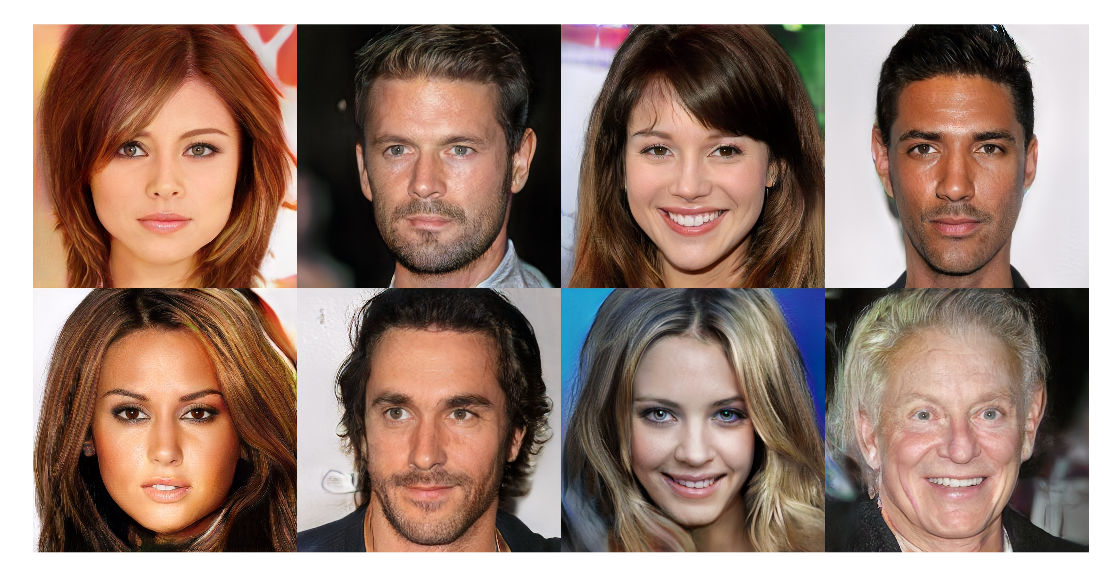

# Актуальность

> 

Состязательная тренировка сетей самая интересная идея в машинном обучении. Пока что GAN используют для того, чтобы уметь отличать подделки от настоящих вещей, для улучшения качества фото или для получения фотореалистичных изображений, например, элементов промышленного дизайна, дизайнов интерьера, одежды, сумок, сцен компьютерных игр и т.д. В общих чертах потенциал GAN почти безграничен.


# Как работают GAN

> 


Работает GAN на основе 2 других нейросетей. Одна нейронная сеть, называемая генератором, генерирует новые экземпляры данных, а другая — дискриминатор, оценивает их на подлинность; т.е. дискриминатор решает, относится ли каждый экземпляр данных к набору тренировочных или нет.


# Дискриминатор

> 


Дискриминационные алгоритмы пытаются классифицировать входные данные. Учитывая особенности полученных данных, они стараются определить категорию, к которой они относятся.

К примеру, пробегая все слова в письме дискриминационный алгоритм может предсказать, является сообщение спамом или не спамом. Спам — это категория, а пакет слов, собранный из электронной почты — образы, которые составляют входные данные. Математически категории обозначают y, а образы обозначают x. Запись p(y|x) используется для обозначения «вероятности y при заданном x», которая обозначает «вероятность того, что электронное письмо является спамом при имеющемся наборе слов».

Итак, дискриминационные функции сопоставляют образы с категорией. Они заняты только этой корреляцией.

# **Генератор**

> 


Генеративные алгоритмы заняты обратным. Вместо того, чтобы предсказывать категорию по имеющимся образам, они пытаются подобрать образы к данной категории.

В то время как дискриминационные алгоритмы волнует взаимосвязь между y и x, генеративные алгоритмы волнует “откуда берутся x”. Они позволяют находить p(x|y), вероятность x при данном y или вероятность образов при данном классе (генеративные алгоритмы также могут использоваться в качестве классификаторов. Они могут делать больше, чем классифицировать входные данные.)

Еще одно представление о работе генеративных алгоритмов можно получить, разделяя дискриминационные модели от генеративных таким образом:

*   Дискриминационные модели изучают границу между классами;
*   Генеративные модели моделируют распределение отдельных классов.



# Шаги, которые проходит GAN:

>


*   Генератор получает рандомное число и возвращает изображение.
*   Это сгенерированное изображение подается в дискриминатор наряду с потоком изображений, взятых из фактического набора данных.
*   Дискриминатор принимает как реальные, так и поддельные изображения и возвращает вероятности, числа от 0 до 1, причем 1 представляет собой подлинное изображение и 0 представляет фальшивое.





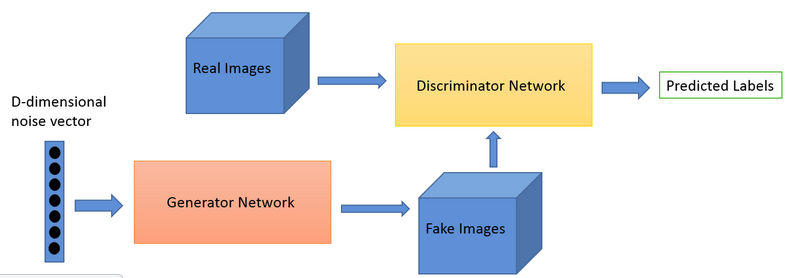

Рассмотрим MNIST как пример GAN. На самом деле, MNIST это пример простой генеративно состязательной нейросети. MNIST это набор данных состоящий из множества примеров написания рукописных цифр. Нейросеть получает на вход изображение и создает новое, причем каждый следующий раз цифры все более и более похожи на оригинал


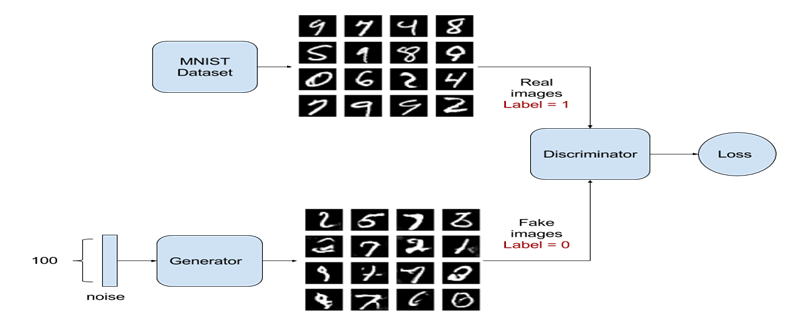

# Пример MNIST

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Гипер параметры
latent_size = 64
hidden_size = 256
image_size = 784
num_epochs = 5
batch_size = 100
sample_dir = 'samples'

# Создайте каталог, если он не существует
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

# Обработка изображений
# transform = transforms.Compose([
# transforms.ToTensor(),
# transforms.Normalize(mean=(0.5, 0.5, 0.5), # 3 для RGB каналов
# std=(0.5, 0.5, 0.5))])
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5], std=[0.5])])

# Набор данных MNIST
mnist = torchvision.datasets.MNIST(root='C:/Users/Lenovo/Desktop/Programs/',
                                   train=True,
                                   transform=transform,
                                   download=True)

# Загрузчик данных
data_loader = torch.utils.data.DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True)

# Дискриминатор
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0,2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0,2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

# Генератор 
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

# Параметры устройства
D = D.to(device)
G = G.to(device)

# Бинарные кросс-энтропийные потери и оптимизатор
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

#  Приступить к тренировкам
total_step = len(data_loader)
for epoch in range(num_epochs):
    for i, (images,_) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)
        
        # Создайте метки, которые позже будут использоваться в качестве входных данных для потери BCE
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ================================================================== #
        # Тренеровка дискриминатора #
        # ================================================================== #

        # Вычислить BCE_Loss с использованием реальных изображений, где BCE_Loss (x, y): - y * log(D (x)) - (1-y) * log(1-D (x))
        # Второй член убытка всегда равен нулю, так как real_labels == 1
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        # Вычислить все потери с помощью поддельных изображений
        # Вычислить все потери с помощью поддельных изображений
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop и оптимизация
        d_loss = d_loss_real + d_loss_fake
        reset_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # ================================================================== #
        # Тренируйте генератор #
        # ================================================================== #

        # Вычисление потерь с помощью поддельных изображений
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        # Мы обучаем G максимизировать log(D(G (z)) вместо минимизации log (1-D (G (z)))
        # По этой причине см. Последний абзац раздела 3. https://arxiv.org/pdf/1406.2661.pdf
        g_loss = criterion(outputs, real_labels)
        
        # Backprop и оптимизация
        reset_grad()
        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
 .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    
    # Save real images
    if (epoch+1) == 1:
        images = images.reshape(images.size(0), 1, 28, 28)
        save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'))
    
    # Save sampled images
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    save_image(denorm(fake_images), os.path.join(sample_dir, 'fake_images-{}.png'.format(epoch+1)))

# Save the model checkpoints 
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')


Epoch [0/5], Step [200/600], d_loss: 0.0746, g_loss: 3.4459, D(x): 0.98, D(G(z)): 0.05
Epoch [0/5], Step [400/600], d_loss: 0.0411, g_loss: 5.4509, D(x): 0.98, D(G(z)): 0.02
Epoch [0/5], Step [600/600], d_loss: 0.0251, g_loss: 5.7155, D(x): 0.99, D(G(z)): 0.02
Epoch [1/5], Step [200/600], d_loss: 0.2254, g_loss: 3.5183, D(x): 0.93, D(G(z)): 0.10
Epoch [1/5], Step [400/600], d_loss: 0.1598, g_loss: 3.1192, D(x): 0.95, D(G(z)): 0.08
Epoch [1/5], Step [600/600], d_loss: 0.8361, g_loss: 1.7050, D(x): 0.72, D(G(z)): 0.27
Epoch [2/5], Step [200/600], d_loss: 0.8544, g_loss: 1.7908, D(x): 0.63, D(G(z)): 0.17
Epoch [2/5], Step [400/600], d_loss: 0.1982, g_loss: 2.5358, D(x): 0.98, D(G(z)): 0.16
Epoch [2/5], Step [600/600], d_loss: 0.8770, g_loss: 1.8952, D(x): 0.66, D(G(z)): 0.23
Epoch [3/5], Step [200/600], d_loss: 0.1602, g_loss: 3.3477, D(x): 0.95, D(G(z)): 0.10
Epoch [3/5], Step [400/600], d_loss: 0.9568, g_loss: 1.6105, D(x): 0.76, D(G(z)): 0.42
Epoch [3/5], Step [600/600], d_loss: 1.4510

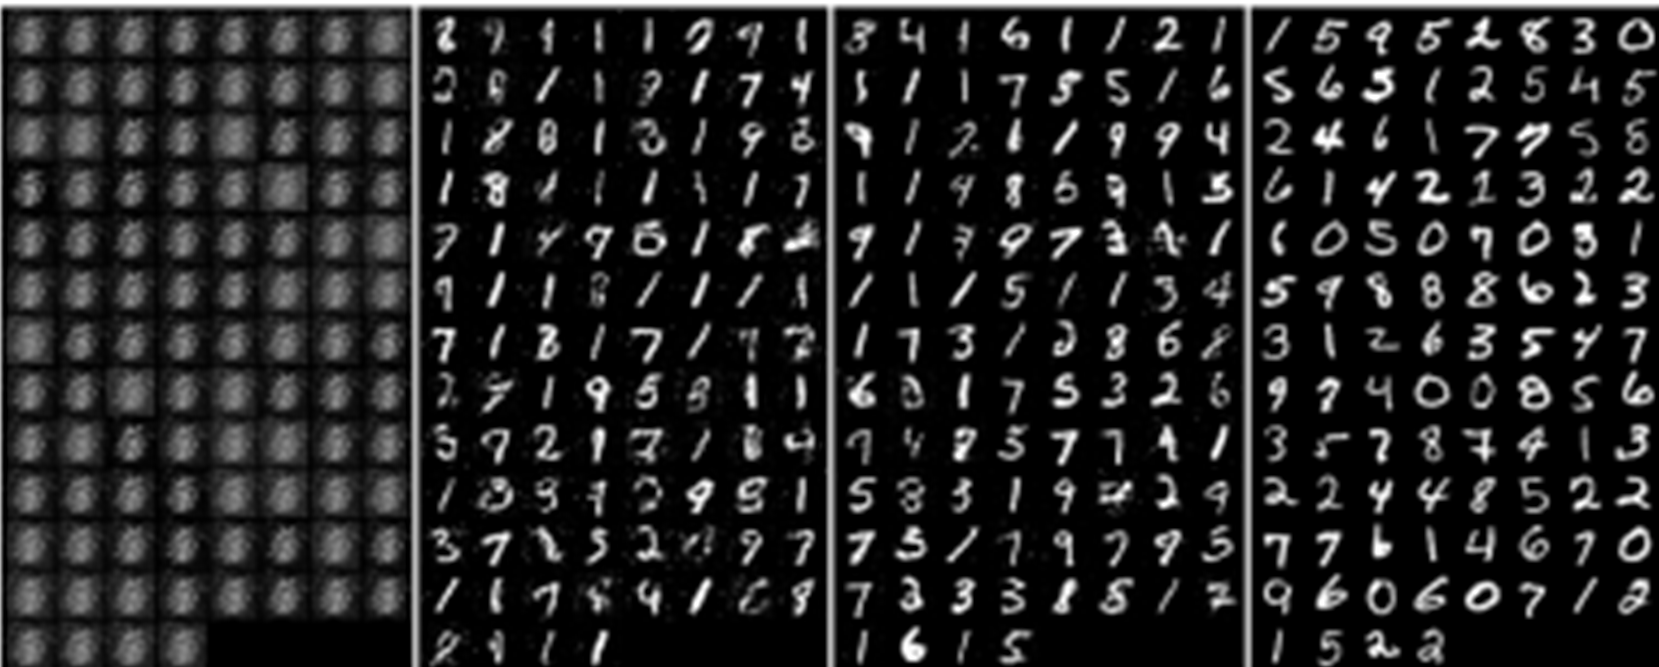


*   1 картинка - это 1 эпоха
*   2 картинка - 100 эпоха
*   3 картинка - 200 эпоха
*   4 картинка - оригинал 


